# XTern FoodieX App

In this project, I am going to be analyzing the dataset of a food app that has information the about restaurants, their locations, cuisines, average costs, etc. I do the following:

1. Determine the most common cooking time and the average cost.

2. Find out how many restaurants serve a specific cuisine.

3. Map the longitudes and the latitudes to find where the restaurants are located.

4. Create a scoring algorithm to rate these restaurants.

## Loading and Cleaning the Data

First of all, using the appropriate libraries, the dataset was loaded. It was checked for missing values and some basic descriptive statistical analysis was performed. The types of entries were also checked. Most of the entries were objects, rendering them useless for further analysis. They were converted into integers or floats. Now, we are done with pre-processing.

In [1]:
#we load all the relevant libraries

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#override the matplotlib style of graphs wiht seaborn.
sns.set()

In [2]:
#we load the dataset

data = pd.read_csv("2020-XTern-DS.csv")
data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   object 
 5   Minimum_Order  2019 non-null   object 
 6   Rating         2019 non-null   object 
 7   Votes          2019 non-null   object 
 8   Reviews        2019 non-null   object 
 9   Cook_Time      2019 non-null   object 
dtypes: float64(2), object(8)
memory usage: 157.9+ KB


In [4]:
#descriptive statistics 

data.describe(include='all')

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
count,2019,2019.000000,2019.000000,2019,2019,2019,2019,2019,2019,2019
unique,1807,NaN,NaN,726,22,7,28,524,360,7
top,ID_4625,NaN,NaN,North Indian,$20.00,$50.00,-,-,-,30 minutes
freq,7,NaN,NaN,152,548,1856,216,380,415,1346
mean,NaN,39.499131,-85.503494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.285759,0.290395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,39.000105,-85.998864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,39.263364,-85.748611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,39.494870,-85.509055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,39.741469,-85.245741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check for missing values -- none found

data.isnull().sum()

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

In [6]:
#replace the dollar sign to convert into integers or floats
#The source code can be found in this Kaggle notebook: https://www.kaggle.com/cdelany7/exploration-of-college-salaries-by-major

dollar_cols = ['Average_Cost','Minimum_Order','Cook_Time']

for x in dollar_cols:
    data[x] = data[x].str.replace("$","")
    data[x] = data[x].str.replace(",","")
    data[x] = data[x].str.replace("minutes","")
    data[x] = pd.to_numeric(data[x])

data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12,4,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11,4,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99,30,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176,95,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521,235,65


In [7]:
#convert strings 

string_cols = ['Rating','Votes','Reviews']
for x in string_cols:
    data[x] = data[x].str.replace("-","")
    data[x] = data[x].str.replace("NEW","")
    data[x] = data[x].str.replace("Opening Soon","")
    data[x] = pd.to_numeric(data[x])

data.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12.0,4.0,30
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11.0,4.0,30
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99.0,30.0,65
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176.0,95.0,30
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521.0,235.0,65


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   float64
 5   Minimum_Order  2019 non-null   float64
 6   Rating         1666 non-null   float64
 7   Votes          1639 non-null   float64
 8   Reviews        1604 non-null   float64
 9   Cook_Time      2019 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 157.9+ KB


In [9]:
data.describe(include='all')

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
count,2019,2019.000000,2019.000000,2019,2019.000000,2019.000000,1666.000000,1639.000000,1604.000000,2019.000000
unique,1807,NaN,NaN,726,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4625,NaN,NaN,North Indian,NaN,NaN,NaN,NaN,NaN,NaN
freq,7,NaN,NaN,152,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.499131,-85.503494,NaN,20.123824,53.342249,3.609304,254.799268,127.373441,36.921743
std,NaN,0.285759,0.290395,NaN,12.986214,20.314896,0.422452,561.674069,330.305363,11.804352
min,NaN,39.000105,-85.998864,NaN,5.000000,0.000000,2.400000,4.000000,1.000000,10.000000
25%,NaN,39.263364,-85.748611,NaN,10.000000,50.000000,3.300000,18.000000,7.000000,30.000000
50%,NaN,39.494870,-85.509055,NaN,20.000000,50.000000,3.600000,65.000000,27.000000,30.000000
75%,NaN,39.741469,-85.245741,NaN,20.000000,50.000000,3.900000,246.000000,102.250000,45.000000


## 1.Preliminary and Exploratory Data Analysis

In this section, I play around with visuals to get insights using basic graphs like bar plots and pie charts.

### Correlation Matrix

I begin by creating a correlation matrix. I am interested in knowing if my assumption is true. Less cooking time might imply more number of orders.**The correlation matrix show very weak correlations among the observations**. So my assumption was wrong. 

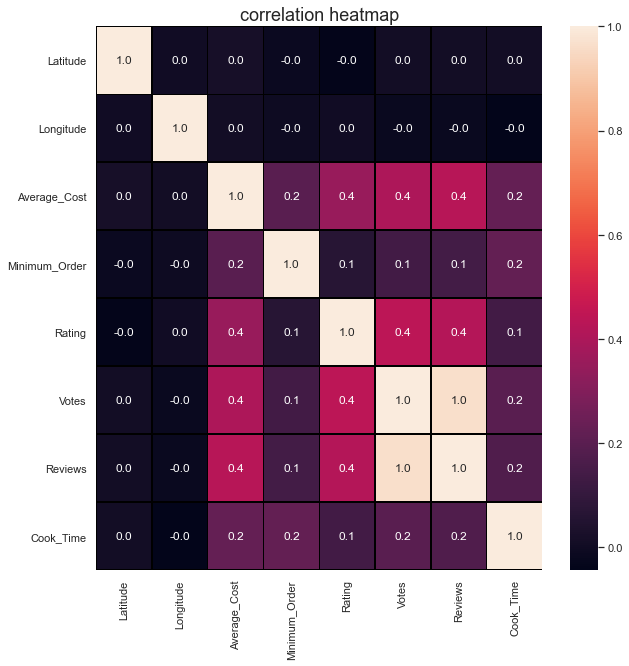

In [10]:
#plot a correalation heatmap using seaborn. 

plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True,linewidths=.5,linecolor='black',fmt = '1.1f')
plt.title('correlation heatmap',size = 18)
plt.show()

### Average Cooking Time

The average cooking time is explored. I get the unique values and their counts and plot a barplot. **It looks like majority of the restraunts take around 30 minutes or so to prepare a meal.**

In [11]:
cooktime= data['Cook_Time'].value_counts()
cooktime

30     1346
45      484
65      177
120       6
20        3
10        2
80        1
Name: Cook_Time, dtype: int64

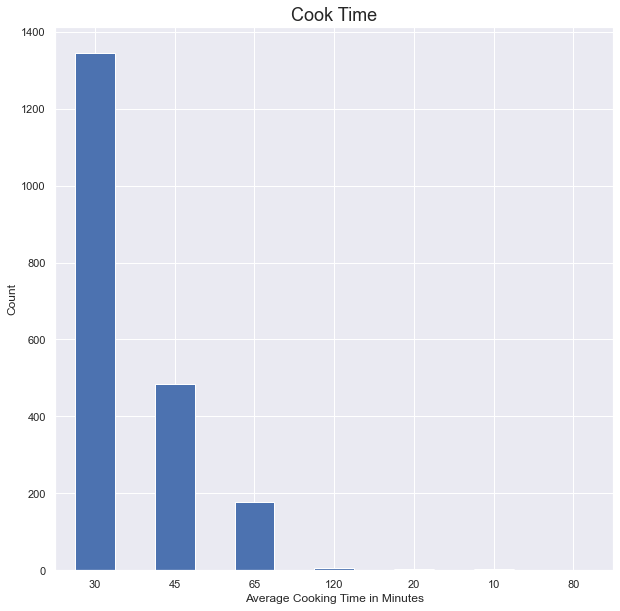

In [12]:
#create a barplot of the average cook time

plt.subplots(figsize=(10,10))
cooktime.plot.bar(rot=0)
plt.title('Cook Time',size = 18)
plt.xlabel('Average Cooking Time in Minutes')
plt.ylabel('Count')
plt.show()

### Average Cost

A piechart is created to see what's the average cost breakdown like. **Most of the restraunts charge (27.1%) 20 dollars followed by 10 dollars at 23.9% and 15 dollars at 23.3%.**

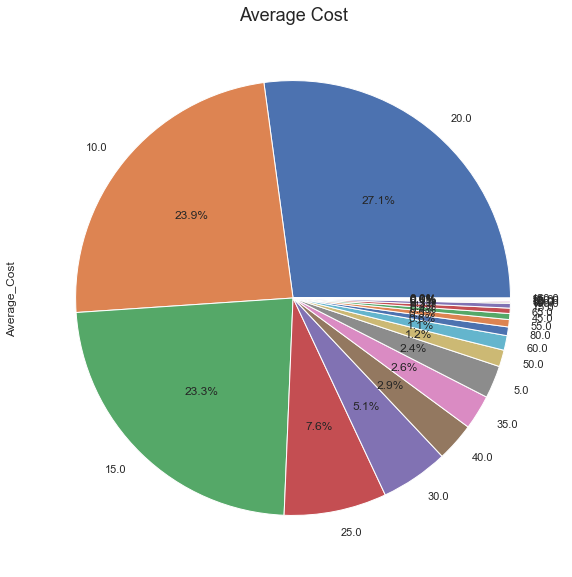

In [13]:
#create a pie chart of the average cost

plt.subplots(figsize=(10,10))
data.Average_Cost.value_counts().head(50).plot.pie(autopct='%1.1f%%')
plt.title('Average Cost',size = 18)
plt.show()

## 2.Types of Cuisines

Here, the most popular cuisines were sought to find. The data in the "Cuisines" column was comma-separated. Comma delimiting was used to separate the data and then strip it. Nested for loops were used to iterate over the rows and columns. A tuple was created to keep a track of how many times the key appears.

Although the histogram makes it difficult to read the labels, some bars stick out the most ( Zooming in helps though).
**North Indian is the most popular cuisines with 878 restraunts serving, the second most popular is Chinese with 631 restraunts serving, and the third most popular is Fast Food at 561.**


In [14]:
#comma-delimiting 

cuisines= data["Cuisines"].str.split(",")
cuisines

0        [Fast Food,  Rolls,  Burger,  Salad,  Wraps]
1                              [Ice Cream,  Desserts]
2                 [Italian,  Street Food,  Fast Food]
3                  [Mughlai,  North Indian,  Chinese]
4                                  [Cafe,  Beverages]
                            ...                      
2014    [North Indian,  Pizza,  Burger,  Continental]
2015                                [Awadhi,  Bihari]
2016                          [Fast Food,  Beverages]
2017                              [Kebab,  Fast Food]
2018                           [Desserts,  Beverages]
Name: Cuisines, Length: 2019, dtype: object

{'Fast Food': 561, 'Rolls': 96, 'Burger': 54, 'Salad': 46, 'Wraps': 18, 'Ice Cream': 60, 'Desserts': 204, 'Italian': 118, 'Street Food': 141, 'Mughlai': 170, 'North Indian': 878, 'Chinese': 631, 'Cafe': 87, 'Beverages': 263, 'South Indian': 248, 'Thai': 35, 'Asian': 32, 'Mithai': 63, 'Momos': 59, 'Indonesian': 1, 'Biryani': 185, 'Kerala': 10, 'Bihari': 3, 'Mexican': 15, 'Japanese': 9, 'Bakery': 105, 'Burmese': 2, 'Bubble Tea': 1, 'Tea': 11, 'Pizza': 86, 'Lucknowi': 5, 'Mangalorean': 3, 'European': 13, 'Continental': 97, 'Sandwich': 49, 'Healthy Food': 49, 'Bengali': 22, 'American': 20, 'Mishti': 10, 'Hyderabadi': 6, 'Andhra': 13, 'Assamese': 1, 'Maharashtrian': 27, 'German': 1, 'Arabian': 15, 'Finger Food': 14, 'Kebab': 33, 'Chettinad': 4, 'Seafood': 40, 'Juices': 27, 'Parsi': 3, 'Sushi': 6, 'Odia': 6, 'Tamil': 2, 'Cantonese': 1, 'North Eastern': 8, 'Tibetan': 11, 'Lebanese': 22, 'Spanish': 2, 'Bar Food': 2, 'Konkan': 1, 'Paan': 8, 'Steak': 4, 'Mediterranean': 5, 'Bohri': 1, 'Afghan': 

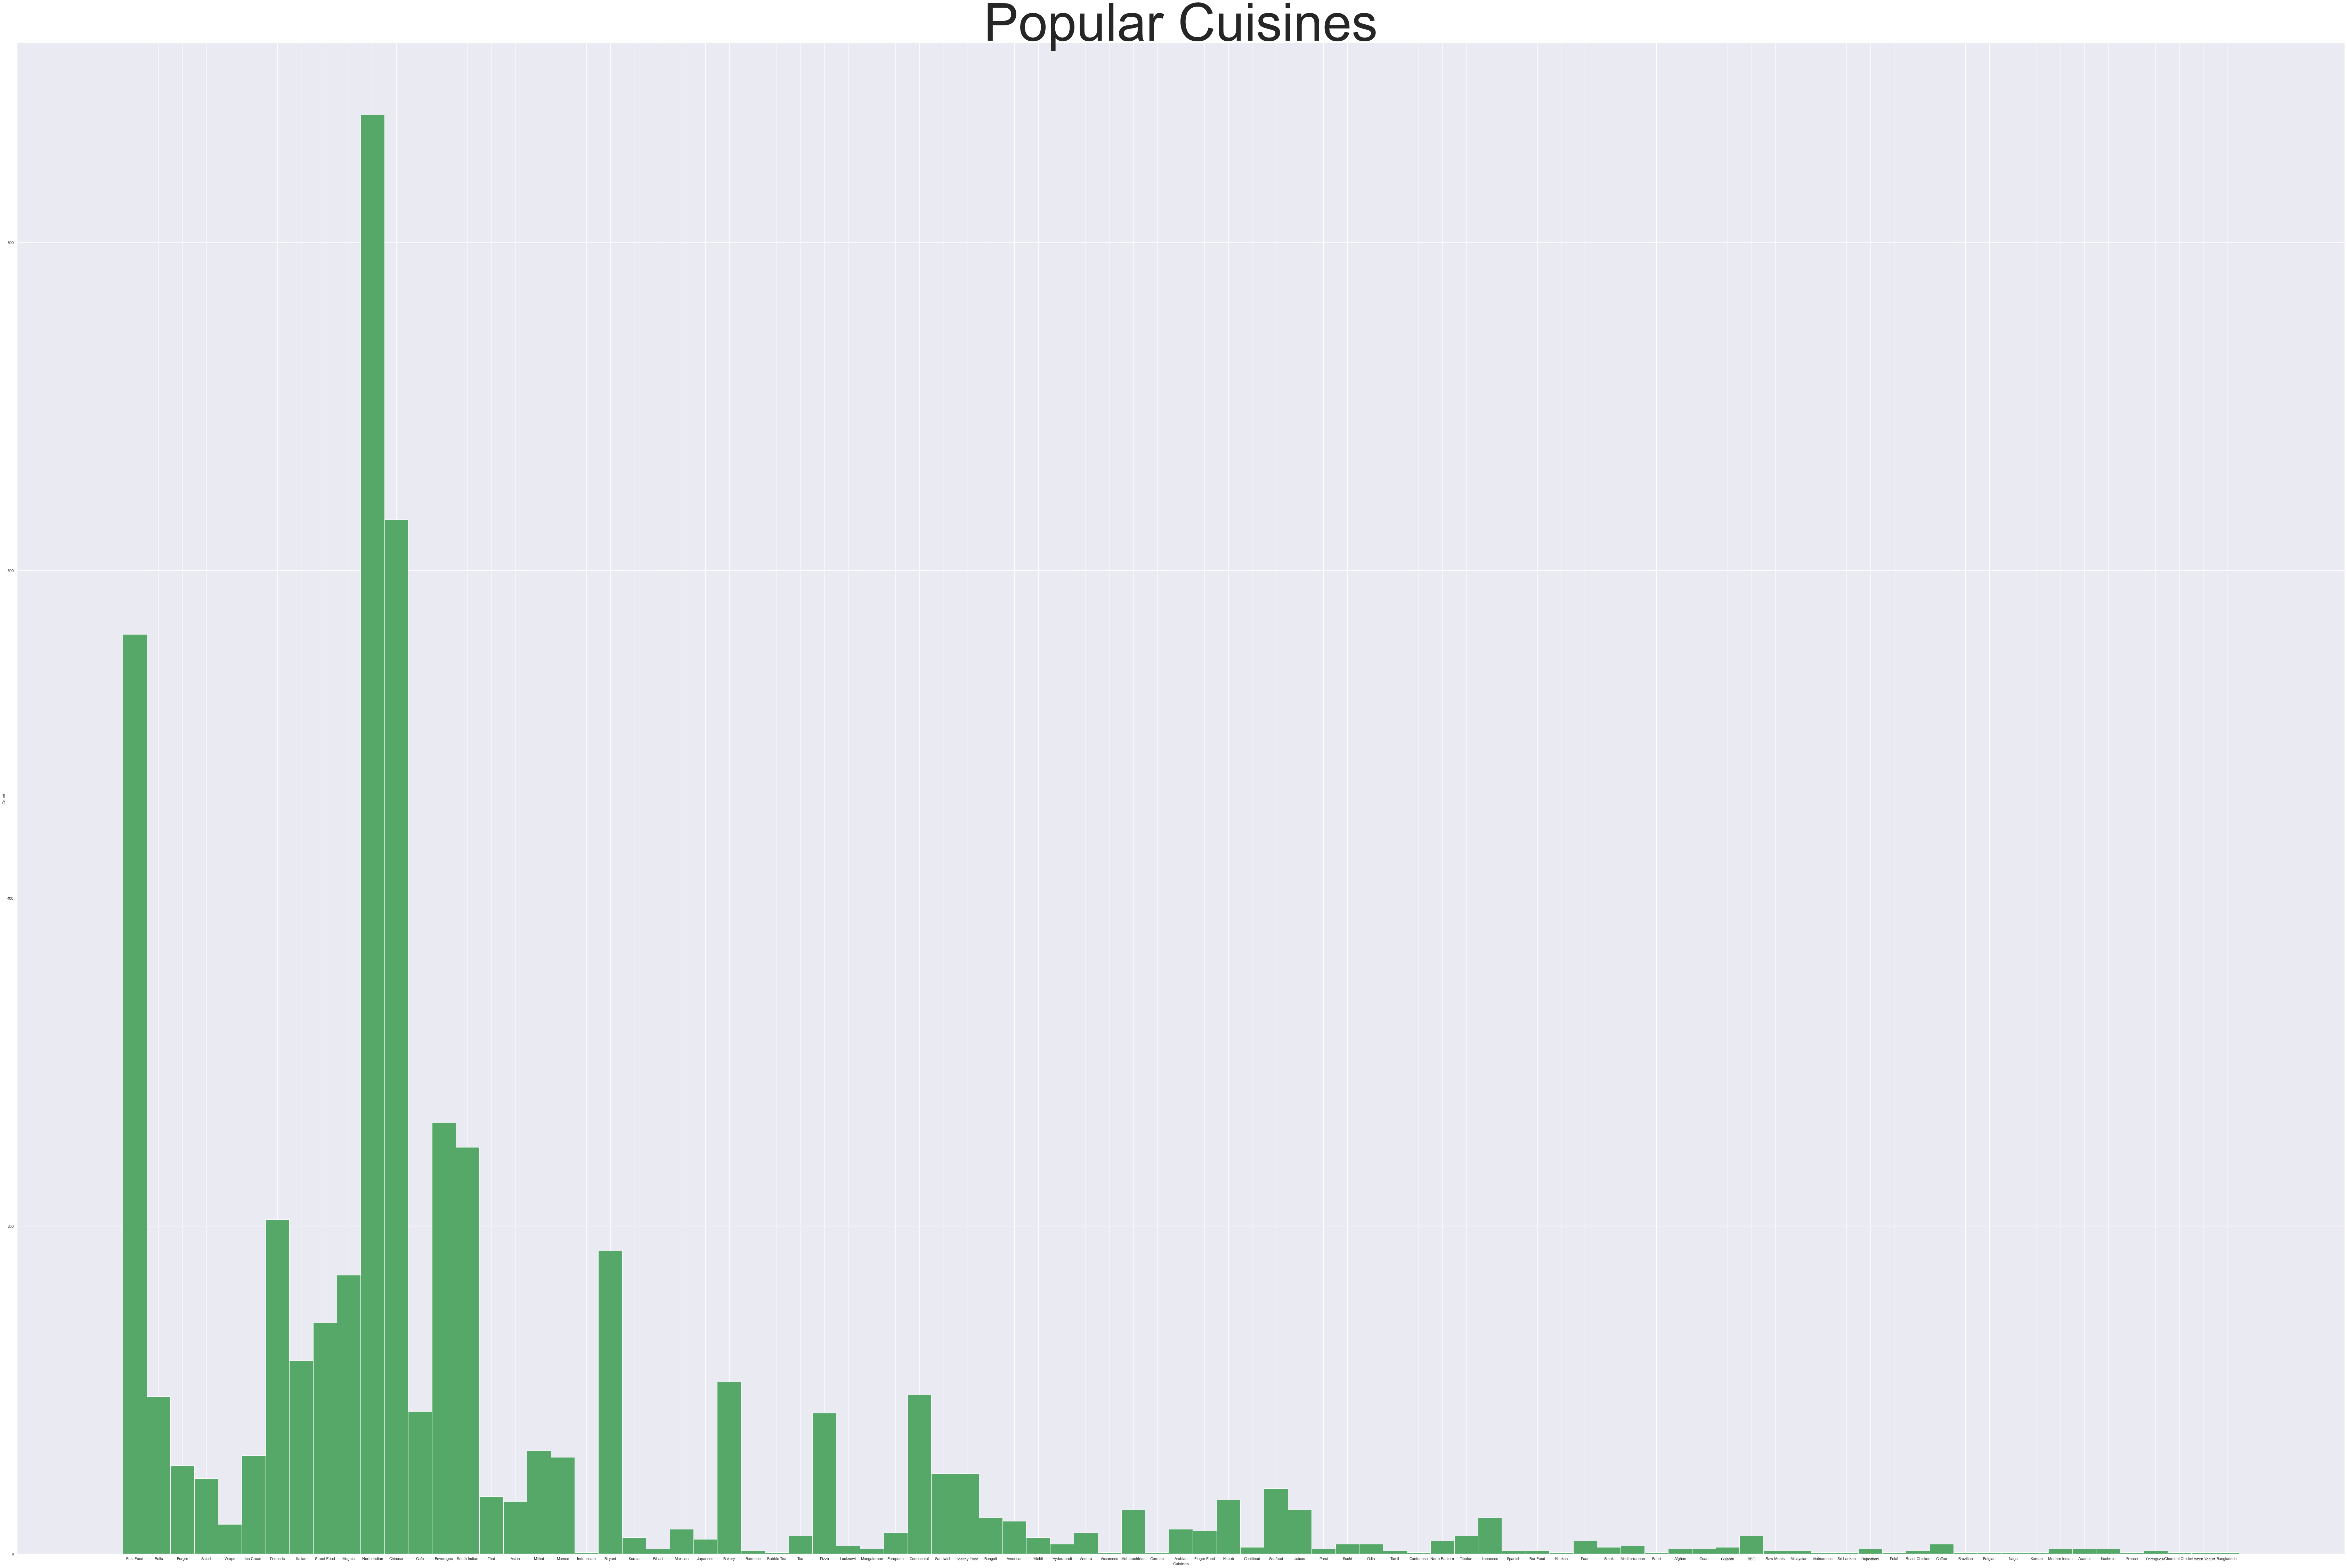

In [15]:
#obtain all the cuisines.

cuisine_count = {}

for i in cuisines:
    for j in i:
        j = j.strip()
        
        if j in cuisine_count:
            cuisine_count[j] += 1
        else:
            cuisine_count[j] = 1
            
print(cuisine_count)

plt.subplots(figsize=(120,80))
plt.bar(cuisine_count.keys(), cuisine_count.values(), 1, color='g')
plt.title('Popular Cuisines',size = 150)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

## 3.Location

A scatterplot with a map-like grid is used to understand the location. A more zoomed-in plot is also created. 
**A quick Google Search shows that coordinates belong to the Greater Indianapolis area.**

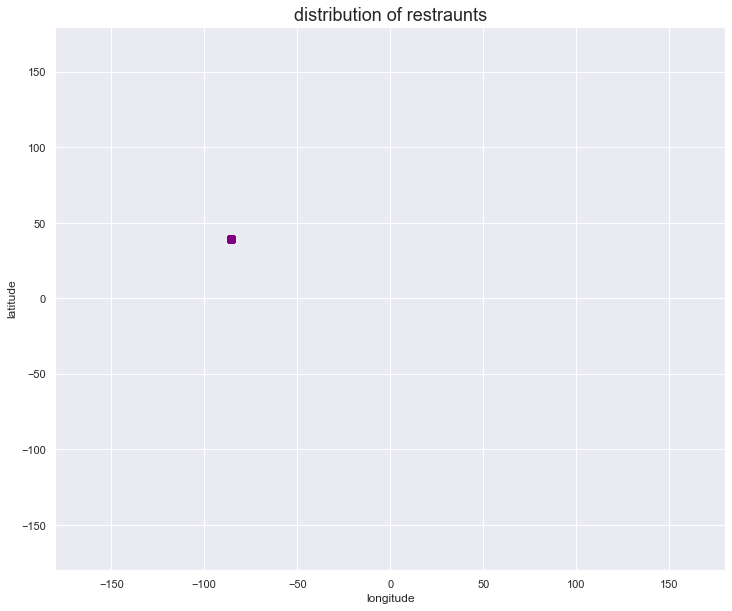

In [21]:
#we get an actual map-like plot using the latitudes and the longitudes

plt.subplots(figsize=(12,10))

plt.scatter(data['Longitude'],data['Latitude'],color="purple")

#we set the limits according to the cartographical convention.
plt.xlim(-180,180)
plt.ylim(-180,180)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('distribution of restraunts',size = 18)
plt.show()

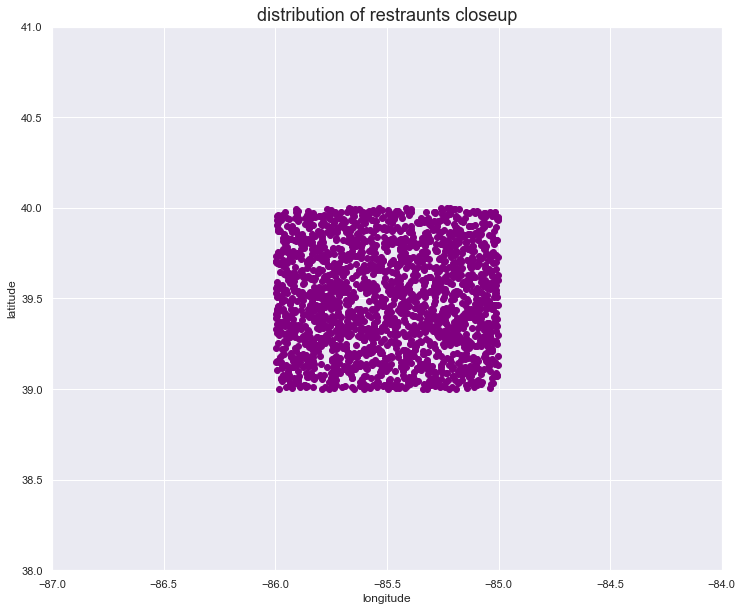

In [22]:
#we zoom in for a better picture.

plt.subplots(figsize=(12,10))

plt.scatter(data['Longitude'],data['Latitude'],color="purple")

plt.xlim(-87,-84)
plt.ylim(38,41)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.title('distribution of restraunts closeup',size = 18)
plt.show()

## 4.Scoring Algorithm

A very rudimentary sorting algorithm is created to find out how restraunts are doing. The descriptive statistics above is used for the quartiles.

**1) If the number of reviews and votes is at the 5% of their respective means, and if the average ratings are below a 3.3, the restraunt is categorized as "below average". This is so that even if a restraunt receives a lot of reviews, ratings drive the overall score.**

**2) If the number of reviews and votes is at the 25% of their respective means, and if the average ratings are between a 3.3 and 3.6, the restraunt is categorized as "good". This is so that even if a restraunt doesn't receive many votes/reviews, again, ratings drive the overall score.**

**3) If the number of reviews and votes is at the 50% of their respective means, and if the average ratings are between above a 3.6, the restraunt is categorized as "excellent". Not only does this restraunt receive a lot of reviews and votes, it is high up in the ratings too.**

**4) For anything else, we do not have enough data. This to avoid restraunts with low number of votes and reviews but average ratings from being penalized. This is also the case when a restraunt is new/opening soon.**

In [16]:
#a new data frame with relevant columns for scoring

score = data.drop(['Latitude','Longitude','Cuisines','Average_Cost','Minimum_Order','Cook_Time'],axis = 1)
score.head()

,Restaurant,Rating,Votes,Reviews
0,ID_6321,3.5,12.0,4.0
1,ID_2882,3.5,11.0,4.0
2,ID_1595,3.6,99.0,30.0
3,ID_5929,3.7,176.0,95.0
4,ID_6123,3.2,521.0,235.0


After creating a new dataframe, the means of votes and reviews are calculated. Nested for loops are used to iterate over the dataset. Conditional statements are used to implement the algorithm.

In [17]:
#we get the means of votes and reviews

mean_votes = score["Votes"].mean()
print("mean votes is ",mean_votes)

mean_reviews = score["Reviews"].mean()
print("mean reviews is ", mean_reviews)

mean votes is  254.79926784624772
mean reviews is  127.37344139650872


In [18]:
#iterate through the rows and add the relevant columns to get scores
x = 0

for i,j in score.iterrows():
    rating = j[1]
    votes = j[2]
    reviews = j[3]
    
    print(x,j[0])
    
    #we implement the scoring algorithm
    
    if rating <= 3.3 and votes > 0.05*mean_votes and reviews > 0.05*mean_reviews:
        print("below average")
    elif rating > 3.3 and rating <= 3.6 and votes > 0.25*mean_votes and reviews > 0.25*mean_reviews:
        print("good")
    elif rating > 3.6 and votes > 0.5*mean_votes and reviews > 0.5*mean_reviews:
        print( "excellent")
    else:
        print("not enough data to score")
    x += 1

0 ID_6321
not enough data to score
1 ID_2882
not enough data to score
2 ID_1595
not enough data to score
3 ID_5929
excellent
4 ID_6123
below average
5 ID_5221
not enough data to score
6 ID_3777
not enough data to score
7 ID_745
excellent
8 ID_2970
not enough data to score
9 ID_3474
excellent
10 ID_5159
not enough data to score
11 ID_1696
excellent
12 ID_1156
not enough data to score
13 ID_354
excellent
14 ID_6891
not enough data to score
15 ID_6406
good
16 ID_2141
not enough data to score
17 ID_3355
not enough data to score
18 ID_5262
not enough data to score
19 ID_8148
not enough data to score
20 ID_1681
below average
21 ID_3994
excellent
22 ID_4012
not enough data to score
23 ID_240
not enough data to score
24 ID_4751
not enough data to score
25 ID_4944
not enough data to score
26 ID_7029
not enough data to score
27 ID_6769
below average
28 ID_5547
below average
29 ID_1957
not enough data to score
30 ID_425
below average
31 ID_4965
excellent
32 ID_5192
below average
33 ID_6079
below 

284 ID_6055
not enough data to score
285 ID_5299
excellent
286 ID_4237
not enough data to score
287 ID_5908
below average
288 ID_7532
not enough data to score
289 ID_1637
not enough data to score
290 ID_3921
not enough data to score
291 ID_8013
not enough data to score
292 ID_7271
below average
293 ID_7269
excellent
294 ID_8281
not enough data to score
295 ID_5063
not enough data to score
296 ID_7501
not enough data to score
297 ID_1555
not enough data to score
298 ID_2301
good
299 ID_465
not enough data to score
300 ID_8478
not enough data to score
301 ID_7301
below average
302 ID_4152
not enough data to score
303 ID_4850
below average
304 ID_7067
not enough data to score
305 ID_4124
not enough data to score
306 ID_1543
not enough data to score
307 ID_1153
good
308 ID_2292
not enough data to score
309 ID_6000
not enough data to score
310 ID_2718
below average
311 ID_6711
below average
312 ID_4406
not enough data to score
313 ID_3969
excellent
314 ID_4393
not enough data to score
315 I

617 ID_7131
not enough data to score
618 ID_94
not enough data to score
619 ID_1701
not enough data to score
620 ID_1784
not enough data to score
621 ID_349
below average
622 ID_7481
excellent
623 ID_4028
not enough data to score
624 ID_4372
not enough data to score
625 ID_3065
good
626 ID_2944
not enough data to score
627 ID_6705
excellent
628 ID_3053
not enough data to score
629 ID_3929
excellent
630 ID_429
excellent
631 ID_3565
excellent
632 ID_2301
excellent
633 ID_1249
not enough data to score
634 ID_1013
not enough data to score
635 ID_2268
not enough data to score
636 ID_6774
not enough data to score
637 ID_7836
not enough data to score
638 ID_8549
not enough data to score
639 ID_6236
not enough data to score
640 ID_7082
not enough data to score
641 ID_3363
not enough data to score
642 ID_4578
excellent
643 ID_2628
not enough data to score
644 ID_4625
not enough data to score
645 ID_2457
excellent
646 ID_1784
excellent
647 ID_2133
excellent
648 ID_1292
not enough data to score
6

950 ID_8553
not enough data to score
951 ID_6395
not enough data to score
952 ID_1586
not enough data to score
953 ID_5305
not enough data to score
954 ID_389
not enough data to score
955 ID_7082
not enough data to score
956 ID_923
not enough data to score
957 ID_5591
not enough data to score
958 ID_4254
not enough data to score
959 ID_8343
not enough data to score
960 ID_6112
not enough data to score
961 ID_4693
not enough data to score
962 ID_4212
not enough data to score
963 ID_1590
not enough data to score
964 ID_3969
not enough data to score
965 ID_3185
excellent
966 ID_2854
not enough data to score
967 ID_2301
not enough data to score
968 ID_2239
not enough data to score
969 ID_4023
not enough data to score
970 ID_5930
not enough data to score
971 ID_1033
not enough data to score
972 ID_3120
not enough data to score
973 ID_2421
excellent
974 ID_8285
not enough data to score
975 ID_5850
not enough data to score
976 ID_5021
good
977 ID_459
not enough data to score
978 ID_847
excell

1283 ID_2824
below average
1284 ID_5435
not enough data to score
1285 ID_4137
not enough data to score
1286 ID_4709
not enough data to score
1287 ID_5093
not enough data to score
1288 ID_5976
not enough data to score
1289 ID_3777
not enough data to score
1290 ID_5903
not enough data to score
1291 ID_7564
not enough data to score
1292 ID_2285
not enough data to score
1293 ID_4315
excellent
1294 ID_6904
not enough data to score
1295 ID_2056
not enough data to score
1296 ID_2545
excellent
1297 ID_1664
not enough data to score
1298 ID_2400
not enough data to score
1299 ID_4010
not enough data to score
1300 ID_1666
excellent
1301 ID_4654
excellent
1302 ID_699
not enough data to score
1303 ID_6602
not enough data to score
1304 ID_8448
excellent
1305 ID_2799
not enough data to score
1306 ID_7098
not enough data to score
1307 ID_4359
not enough data to score
1308 ID_3071
not enough data to score
1309 ID_5367
not enough data to score
1310 ID_2595
not enough data to score
1311 ID_3038
not enough

not enough data to score
1672 ID_335
not enough data to score
1673 ID_785
not enough data to score
1674 ID_7987
excellent
1675 ID_1457
not enough data to score
1676 ID_8403
not enough data to score
1677 ID_8242
below average
1678 ID_6591
not enough data to score
1679 ID_7693
excellent
1680 ID_6018
excellent
1681 ID_7184
excellent
1682 ID_5253
not enough data to score
1683 ID_4298
not enough data to score
1684 ID_4157
excellent
1685 ID_5902
good
1686 ID_8094
not enough data to score
1687 ID_6087
not enough data to score
1688 ID_1946
excellent
1689 ID_6764
not enough data to score
1690 ID_7206
not enough data to score
1691 ID_1020
not enough data to score
1692 ID_3824
excellent
1693 ID_8200
excellent
1694 ID_4216
not enough data to score
1695 ID_2551
not enough data to score
1696 ID_2964
not enough data to score
1697 ID_2298
excellent
1698 ID_4914
excellent
1699 ID_6653
not enough data to score
1700 ID_3660
excellent
1701 ID_3959
not enough data to score
1702 ID_6619
not enough data to s

1956 ID_3457
not enough data to score
1957 ID_6945
not enough data to score
1958 ID_306
excellent
1959 ID_7147
excellent
1960 ID_2659
not enough data to score
1961 ID_2683
not enough data to score
1962 ID_7563
not enough data to score
1963 ID_2604
not enough data to score
1964 ID_695
excellent
1965 ID_2678
not enough data to score
1966 ID_2897
not enough data to score
1967 ID_7433
excellent
1968 ID_1197
not enough data to score
1969 ID_4652
not enough data to score
1970 ID_4317
excellent
1971 ID_5797
below average
1972 ID_4345
excellent
1973 ID_793
not enough data to score
1974 ID_2806
not enough data to score
1975 ID_686
not enough data to score
1976 ID_1046
not enough data to score
1977 ID_3250
not enough data to score
1978 ID_5474
not enough data to score
1979 ID_6683
not enough data to score
1980 ID_517
not enough data to score
1981 ID_7694
not enough data to score
1982 ID_2259
not enough data to score
1983 ID_6054
not enough data to score
1984 ID_4310
not enough data to score
1985

## Conclusion

**If you happen to visit an average restaurant from this dataset, it is most likely:**

**1. It is in the Greater Indianapolis Area**

**2. It serves either North Indian or Chinese food.**

**3. The meal might will likely take 30 mins to cook and might cost you 20 dollars.**

**4. In addition, the scoring algorithm will tell you the overall popularity of the restaurant.** 